In [46]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.metrics import confusion_matrix
import seaborn as sns

def minha_metrica(y_true,y_pred):
    xx = confusion_matrix(y_true,(y_pred>.5).astype(int),normalize="true")
    return tf.math.sqrt(xx[0][0]*xx[1][1])
    

original = pd.read_csv("dados.csv")
le = preprocessing.LabelEncoder()

modificado = pd.DataFrame()
for x in original:
    if original[x].dtypes==object:
        modificado[x] = le.fit_transform(np.array(original[x]))
    else:
        modificado[x] = np.array(original[x])


y = modificado.COMPARECEU_AGENDAMENTO_EXAME
X = modificado.drop('COMPARECEU_AGENDAMENTO_EXAME', axis=1)

Xd,y = np.array(X), 1-np.array(y)
X = (Xd-Xd.min(axis=0))/(Xd.max(axis=0)-Xd.min(axis=0))

X_train, X_test, y_train, y_test = train_test_split(X,  y, test_size=0.25)

In [50]:
mdl = keras.models.Sequential()
mdl.add(keras.Input(shape=(17,)))
mdl.add(keras.layers.Dense(200,activation='elu'))
# mdl.add(keras.layers.Dense(10,activation='elu'))
# mdl.add(keras.layers.Dense(10,activation='elu'))
mdl.add(keras.layers.Dense(1,activation='sigmoid'))

pesos  = {1:1-sum(y)/len(y),0:sum(y)/len(y)}
loss_fct = tf.keras.losses.BinaryCrossentropy(reduction='sum_over_batch_size')
metricas = tf.keras.metrics.BinaryAccuracy(name="binary_accuracy", dtype=None, threshold=0.5)
# metricas = minha_metrica

mdl.compile(optimizer='sgd',loss = loss_fct,metrics = metricas)

hist = mdl.fit(X_train,y_train,epochs=100,class_weight=pesos,validation_split=0.25)

Epoch 1/100
148/148 [==============================] - 2s 3ms/step - loss: 0.0873 - binary_accuracy: 0.6182 - val_loss: 0.6896 - val_binary_accuracy: 0.5471
Epoch 2/100
148/148 [==============================] - 0s 2ms/step - loss: 0.0870 - binary_accuracy: 0.4890 - val_loss: 0.6983 - val_binary_accuracy: 0.4548
Epoch 3/100
148/148 [==============================] - 0s 2ms/step - loss: 0.0868 - binary_accuracy: 0.3933 - val_loss: 0.7010 - val_binary_accuracy: 0.4262
Epoch 4/100
148/148 [==============================] - 0s 2ms/step - loss: 0.0867 - binary_accuracy: 0.4137 - val_loss: 0.7064 - val_binary_accuracy: 0.3728
Epoch 5/100
148/148 [==============================] - 0s 2ms/step - loss: 0.0865 - binary_accuracy: 0.3642 - val_loss: 0.7064 - val_binary_accuracy: 0.3861
Epoch 6/100
148/148 [==============================] - 0s 2ms/step - loss: 0.0864 - binary_accuracy: 0.3651 - val_loss: 0.7053 - val_binary_accuracy: 0.4033
Epoch 7/100
148/148 [==============================] - 0s 

In [58]:
y_pred = mdl.predict(X_test).ravel()
confusion_matrix(y_test,(y_pred>.51).astype(int),normalize="true")
minha_metrica(y_test,y_pred)

66/66 [==============================] - 0s 1ms/step


<tf.Tensor: shape=(), dtype=float64, numpy=0.6303470707439626>

<AxesSubplot: >

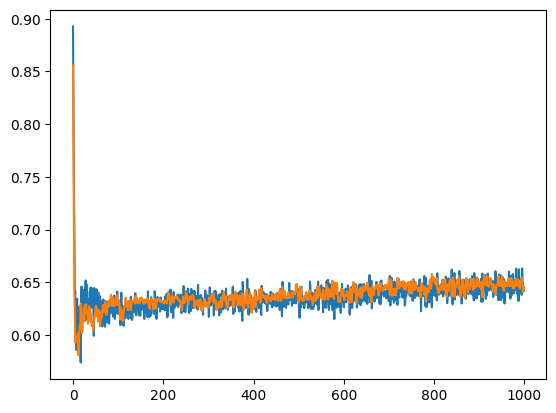

In [43]:
sns.lineplot(hist.history['binary_accuracy'])
sns.lineplot(hist.history['val_binary_accuracy'])

<AxesSubplot: >

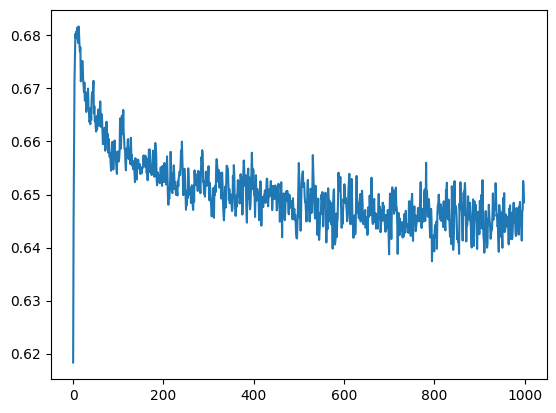

In [44]:
#sns.lineplot(hist.history['loss'])
sns.lineplot(hist.history['val_loss'])